In [1]:
# Load the dataset
insurance <- read.csv("insurance.csv", stringsAsFactors = TRUE)

# Display the structure of the dataset
str(insurance)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 25.7 33.4 27.7 29.8 25.8 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ expenses: num  16885 1726 4449 21984 3867 ...


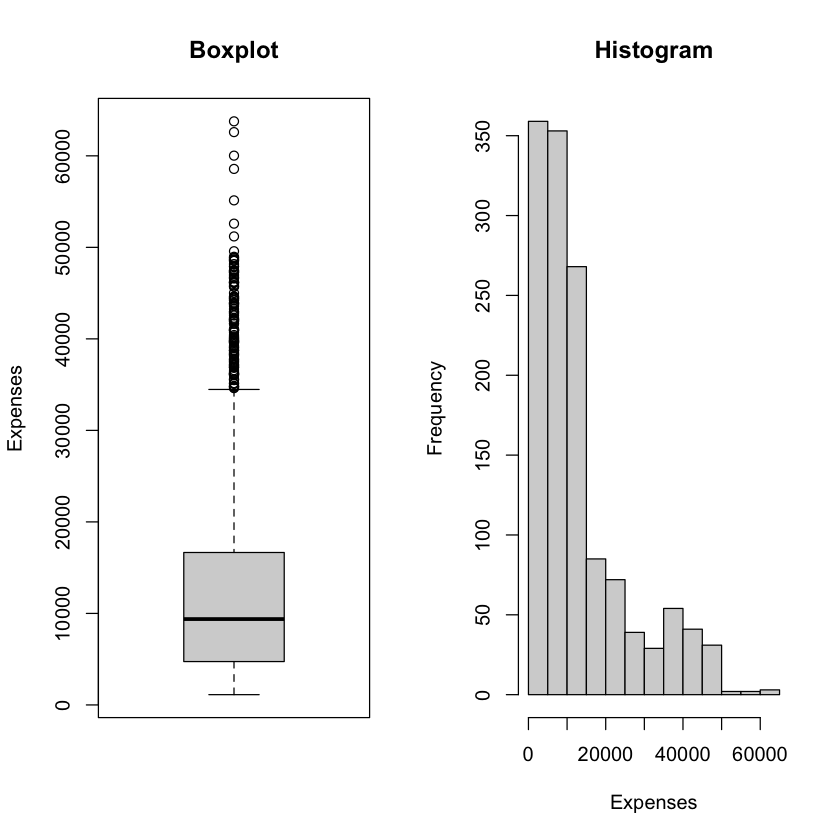

In [2]:
# Set up a 1x2 plotting window
par(mfrow = c(1,2))

# Display a vertical boxplot of "expenses"
boxplot(insurance$expenses, ylab = "Expenses", main = "Boxplot")

# Display a histogram of "expenses"
hist(insurance$expenses, xlab = "Expenses", ylab = "Frequency", main = "Histogram")

In [3]:
# Without expenses
summary(insurance[-7])

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :16.00   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.67   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.70   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.10   Max.   :5.000             
       region   
 northeast:324  
 northwest:325  
 southeast:364  
 southwest:325  
                
                

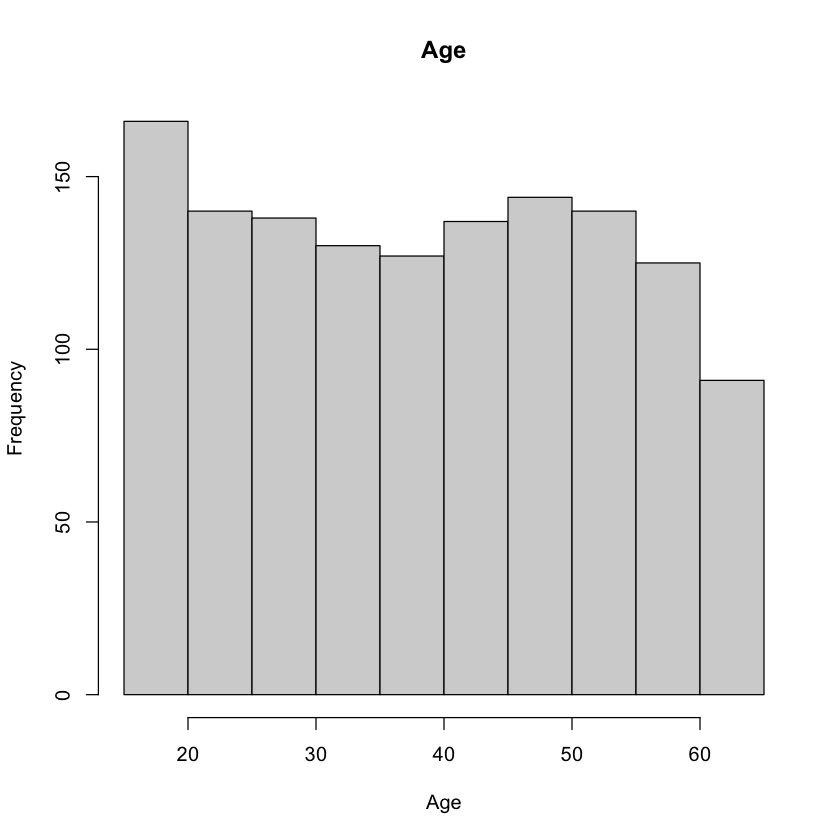

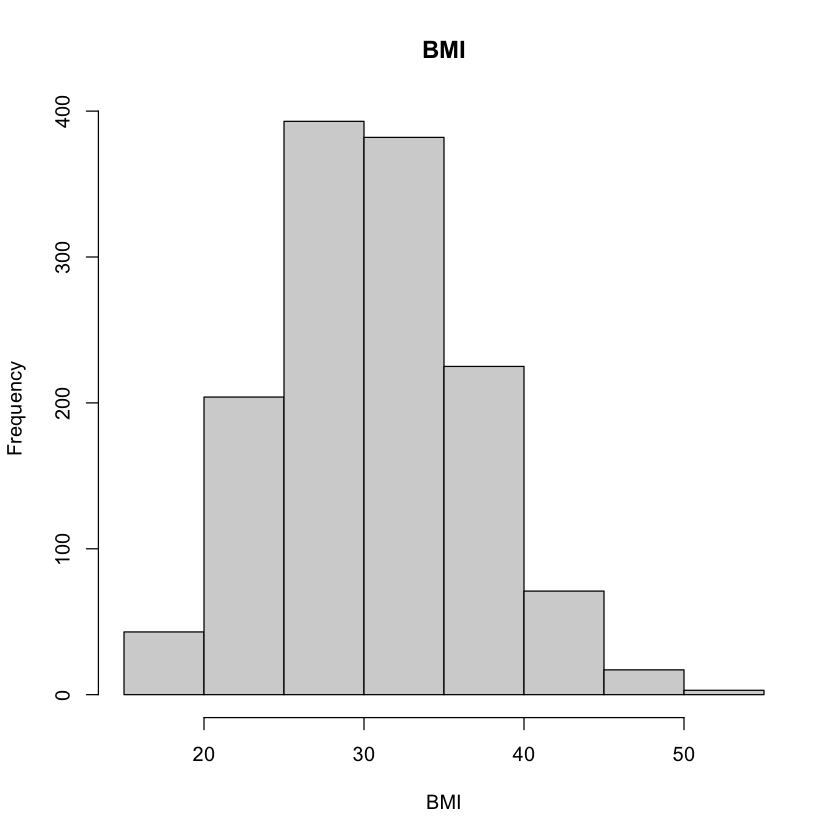

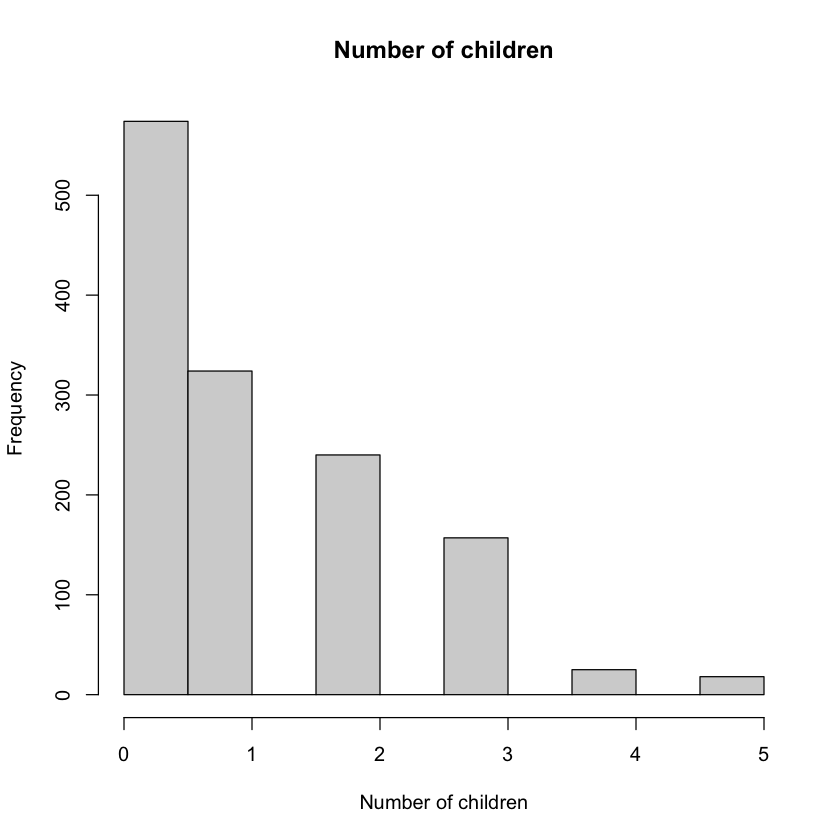

In [4]:
# Display histograms for the numeric variables
hist(insurance$age, xlab = "Age", main = "Age")
hist(insurance$bmi, xlab = "BMI", main = "BMI")
hist(insurance$children, xlab = "Number of children", main = "Number of children")

In [5]:
# Generate a correlation matrix of the numeric variables
cor(insurance[c("age", "bmi", "children", "expenses")])

,age,bmi,children,expenses
age,1.0000000,0.10934101,0.04246900,0.29900819
bmi,0.1093410,1.00000000,0.01264471,0.19857626
children,0.0424690,0.01264471,1.00000000,0.06799823
expenses,0.2990082,0.19857626,0.06799823,1.00000000


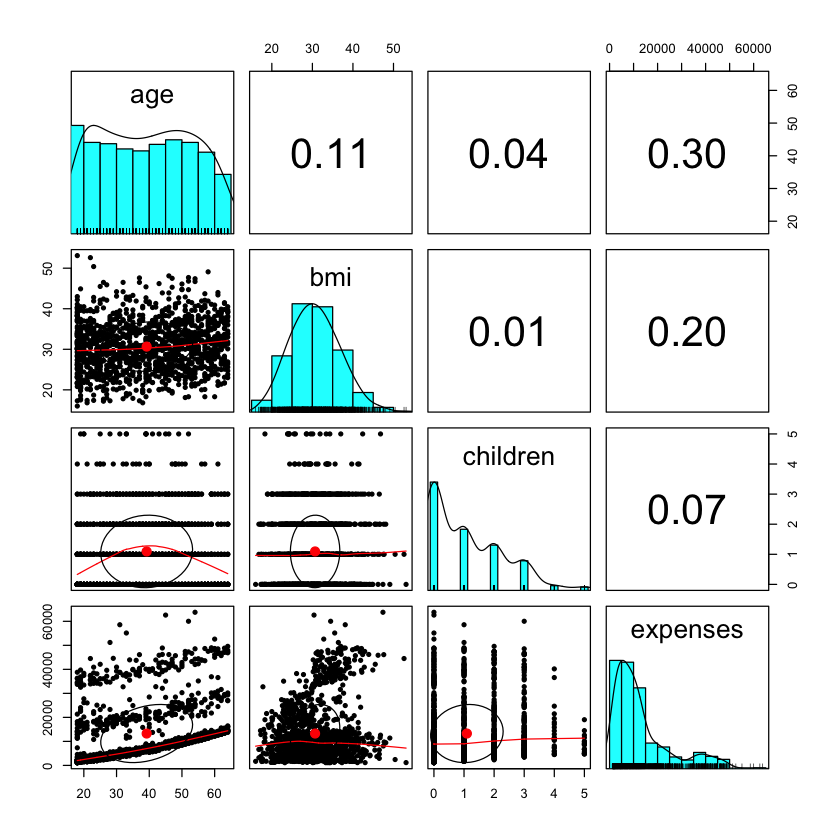

In [6]:
# Load the library
library(psych)

# Display scatterplots, variables' distributions, and their correlations
pairs.panels(insurance[c("age", "bmi", "children", "expenses")])

In [7]:
# Train the model on the data
ins_model <- lm(expenses ~ ., data = insurance)

# Display the model coefficients
ins_model


Call:
lm(formula = expenses ~ ., data = insurance)

Coefficients:
    (Intercept)              age          sexmale              bmi  
       -11941.6            256.8           -131.4            339.3  
       children        smokeryes  regionnorthwest  regionsoutheast  
          475.7          23847.5           -352.8          -1035.6  
regionsouthwest  
         -959.3  


In [8]:
summary(ins_model)


Call:
lm(formula = expenses ~ ., data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11302.7  -2850.9   -979.6   1383.9  29981.7 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11941.6      987.8 -12.089  < 2e-16 ***
age                256.8       11.9  21.586  < 2e-16 ***
sexmale           -131.3      332.9  -0.395 0.693255    
bmi                339.3       28.6  11.864  < 2e-16 ***
children           475.7      137.8   3.452 0.000574 ***
smokeryes        23847.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -352.8      476.3  -0.741 0.458976    
regionsoutheast  -1035.6      478.7  -2.163 0.030685 *  
regionsouthwest   -959.3      477.9  -2.007 0.044921 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.9 on 8 and 1329 DF,  p-value: < 2.2e-16


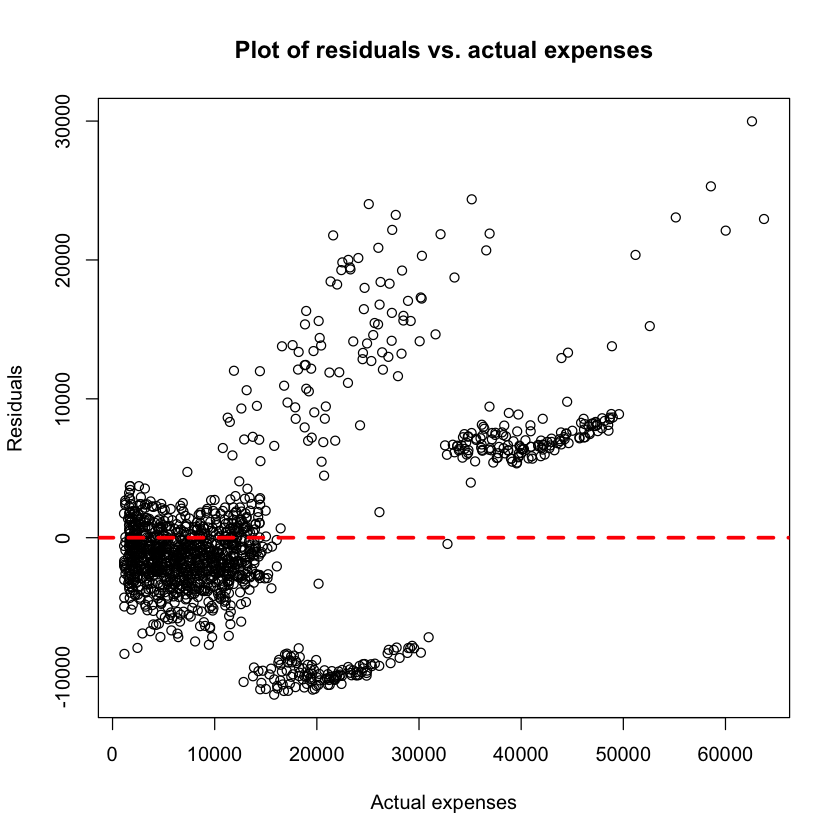

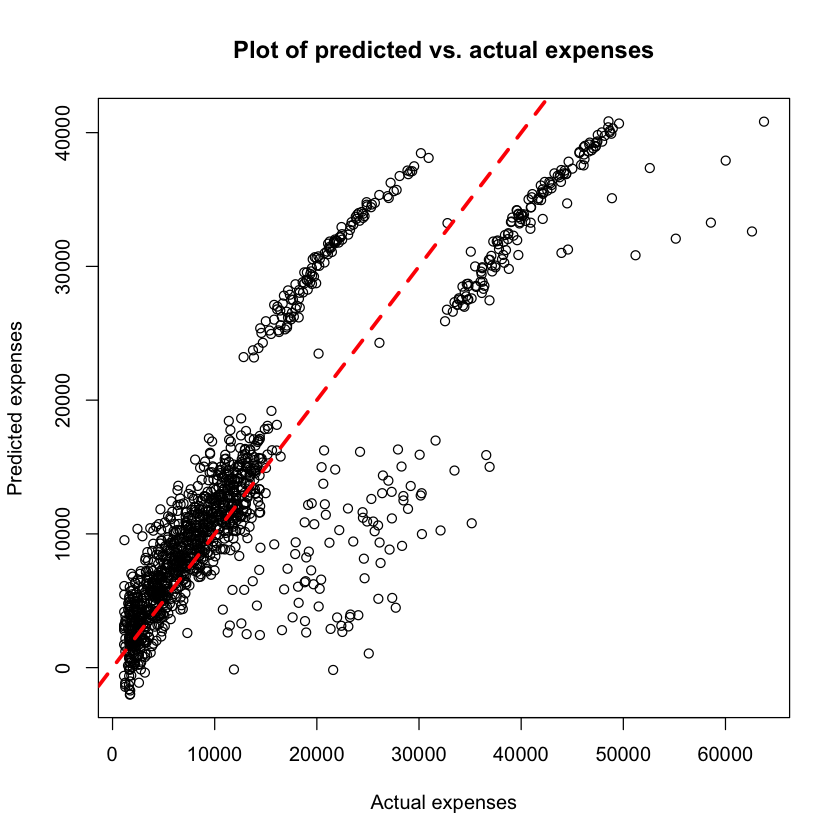

In [9]:
plot(insurance$expenses, ins_model$residuals, xlab = "Actual expenses", ylab = "Residuals", main = "Plot of residuals vs. actual expenses")
abline(0, 0, col = "red", lwd = 3, lty = 2)
plot(insurance$expenses, ins_model$fitted.values, xlab = "Actual expenses", ylab = "Predicted expenses", main = "Plot of predicted vs. actual expenses")
abline(0, 1, col = "red", lwd = 3, lty = 2)

In [10]:
# Create a binary indicator for BMI >= 30 vs. BMI < 30 (used later in the final regression model)
insurance$bmi30 <- ifelse(insurance$bmi >= 30, 1, 0)

In [11]:
# Create the variable containing age squared (used later in the final regression model)
insurance$age2 <- insurance$age^2

In [12]:
ins_model2 <- lm(expenses ~ age + age2 + children + bmi + sex + bmi30*smoker + region, data = insurance)

In [13]:
summary(ins_model2)


Call:
lm(formula = expenses ~ age + age2 + children + bmi + sex + bmi30 * 
    smoker + region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-17297.1  -1656.0  -1262.7   -727.8  24161.6 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       139.0053  1363.1359   0.102 0.918792    
age               -32.6181    59.8250  -0.545 0.585690    
age2                3.7307     0.7463   4.999 6.54e-07 ***
children          678.6017   105.8855   6.409 2.03e-10 ***
bmi               119.7715    34.2796   3.494 0.000492 ***
sexmale          -496.7690   244.3713  -2.033 0.042267 *  
bmi30            -997.9355   422.9607  -2.359 0.018449 *  
smokeryes       13404.5952   439.9591  30.468  < 2e-16 ***
regionnorthwest  -279.1661   349.2826  -0.799 0.424285    
regionsoutheast  -828.0345   351.6484  -2.355 0.018682 *  
regionsouthwest -1222.1619   350.5314  -3.487 0.000505 ***
bmi30:smokeryes 19810.1534   604.6769  32.762  < 2e-16 ***

In [14]:
# Correlation between actual and fitted values
cor(insurance$expenses, ins_model2$fitted.values)

[1] 0.9307999

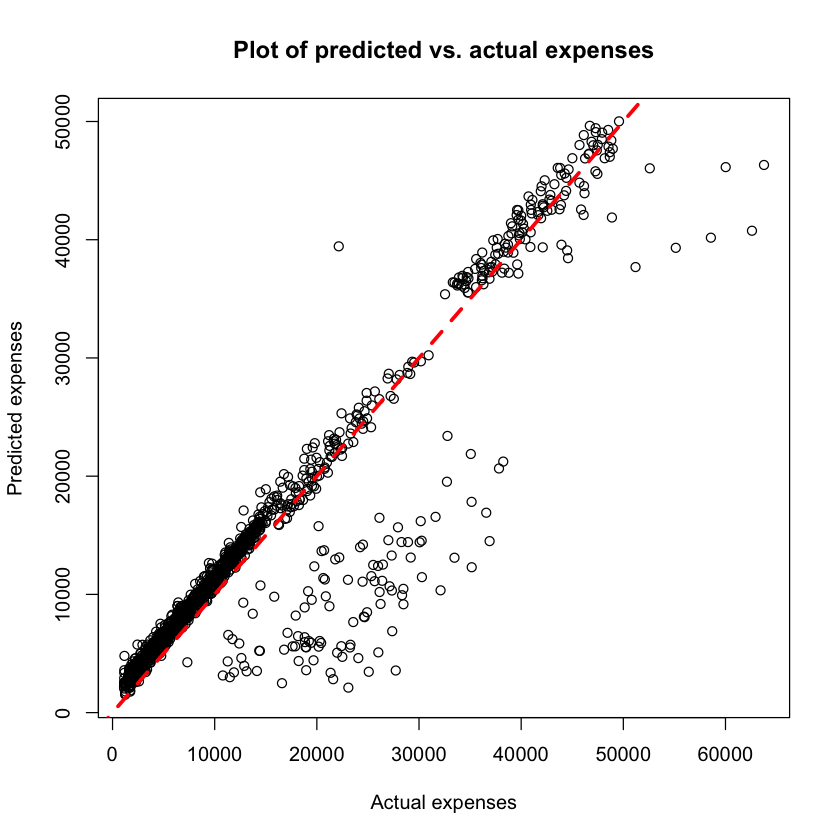

In [15]:
# Scatterplot of predicted vs. actual expenses, together with the y = x line
plot(insurance$expenses, ins_model2$fitted.values, xlab = "Actual expenses", ylab = "Predicted expenses", main = "Plot of predicted vs. actual expenses")
abline(0, 1, col = "red", lwd = 3, lty = 2)

In [16]:
# Dorothy, a 40-year old female with 2 children, BMI 25, non-smoker, living in "southeast"
dorothy <- data.frame(age = 40, age2 = 40^2, children = 2, bmi = 25, sex = "female", bmi30 = 0, smoker = "no", region = "southeast")

# Predict the annual medical expenses
predict(ins_model2, dorothy)

1 
8326.926

In [17]:
# Update "smoker" to yes
dorothy$smoker <- "yes"

# Predict the annual medical expenses
predict(ins_model2, dorothy)

1 
21731.52